In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
!pip install git+https://github.com/boudinfl/pke.git
!python -m nltk.downloader stopwords
!python -m nltk.downloader universal_tagset
!python -m spacy download en # download the english model
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
!pip install langcodes
import pke

  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-fw0zupd4
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-fw0zupd4
  Created wheel for pke: filename=pke-1.8.1-cp36-none-any.whl size=8761404 sha256=05a47c160335690a32952c0e9f222e61dbf416e7e9c083f24d3135bf7348ce28
  Stored in directory: /tmp/pip-ephem-wheel-cache-2o2n08tx/wheels/8d/24/54/6582e854e9e32dd6c632af6762b3a5d2f6b181c2992e165462
Successfully built pke
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may res

In [ ]:
data = pd.read_csv('All_conf.csv',encoding="utf-8-sig")
data

In [ ]:
df1 = data[['Inc','description']]
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
df_clean = pd.DataFrame({'clean': df2})
sent = [row.split(',') for row in df_clean['clean']]
corpus = sent
corpus[0]

['University of Cambridge',
 'Our poster presents the unsupervised segmentation of SAR polarimetric images. These images are multi-band areal images of the Earth captured by satellites with special sensors. The process required to segment these images is massive',
 ' and the task of segmentation is crucial',
 ' as through it we needed to extract important physical information of the area under observation',
 ' such as the geometric orientation',
 ' structure',
 ' shape',
 ' and configuration. We propose a much faster parallel implementation of Wishart Classification Based technique that outperforms the vanilla methods by 240%.']

In [ ]:
corpus = data[['description']]
corpus = corpus.values
corpus[0][0]

In [ ]:
!pip install "tensorflow>=1.7.0"
!pip install tensorflow-hub

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [ ]:
def elmo_vectors(x):
   
  embeddings=elmo(x, signature="default", as_dict=True)["elmo"]
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [ ]:
elmo_embeddings=[]  
print (len(corpus))
for i in range(len(corpus)):
    print (corpus[i])
    elmo_embeddings.append(elmo_vectors([corpus[i][0]])[0])

In [ ]:
#elmo_embeddings_test = elmo_embeddings 
vecdf = pd.DataFrame(elmo_embeddings_test)
vecdf.to_csv('vecdf.csv', index=False)

In [ ]:
vec = pd.read_csv('vectors_inc.csv', encoding="utf-8-sig") 
vec

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,Inc
0,-0.120986,0.244815,-0.351847,0.002052,-0.021593,-0.180534,-0.103912,0.335668,-0.059406,-0.033259,0.019376,0.003997,-0.209925,0.069738,0.407378,0.062462,0.002516,0.247706,-0.155233,-0.052676,0.201533,0.631409,0.031265,-0.007189,0.016897,0.237047,0.115335,0.231069,0.154653,-0.150366,0.181231,0.099936,-0.048217,-0.038037,0.143389,0.065391,-0.315093,-0.091307,0.216377,-0.043939,...,0.083661,0.165483,0.005765,-0.038910,0.064610,0.143320,-0.029124,-0.126216,-0.001654,-0.067146,0.028452,-0.204346,0.105488,-0.336235,-0.022657,0.139283,-0.035255,-0.028634,0.010446,0.347636,0.097938,0.108810,-0.269270,0.042590,-0.276385,-0.016665,0.443122,-0.230705,0.015118,-0.333099,0.090499,0.094147,0.221319,0.206470,0.029612,0.829365,-0.037864,0.501337,-0.065811,University of Cambridge
1,-0.258994,0.217947,-0.148406,0.063405,0.055402,-0.269790,0.106109,0.338629,-0.266026,0.185351,-0.049987,0.137287,-0.292910,-0.147078,0.140473,0.026845,0.021341,0.369228,-0.107740,-0.087362,0.214991,0.347865,0.079941,-0.332618,-0.016383,0.023957,0.002342,0.209507,0.008497,0.128315,0.288133,-0.027503,-0.216466,-0.309523,0.029818,0.065239,-0.316061,0.208153,0.219168,0.092725,...,0.157850,0.107473,0.135586,-0.102599,-0.020619,0.254079,0.200983,0.116844,-0.126177,-0.009683,-0.147576,-0.306389,0.143088,-0.287999,-0.162573,0.211762,0.087804,-0.094702,0.031172,0.210516,0.006551,0.159513,-0.223471,0.129442,-0.164478,-0.128733,0.427243,-0.097886,0.112358,-0.378844,-0.030892,0.096166,-0.098668,0.124017,0.116893,0.825736,-0.033416,0.260644,-0.081266,Hewlett Packard Enterprise
2,-0.273576,0.191287,-0.232686,-0.000753,0.117895,-0.175064,-0.194790,0.045815,0.186184,0.055807,0.088998,0.101711,-0.036166,0.255749,0.306497,0.142211,0.045373,0.238774,-0.253344,-0.054893,0.271103,0.385756,-0.000378,-0.075217,-0.050125,0.024480,0.137490,0.113356,0.218907,-0.010891,0.022876,0.041254,-0.168789,-0.308387,0.246099,0.049970,-0.583740,0.034997,0.151574,-0.008507,...,0.106497,0.164039,-0.016328,0.101193,0.129791,0.217378,0.008532,-0.114752,0.009114,-0.113705,-0.106753,-0.169987,0.188622,-0.296163,0.137210,0.117196,-0.026229,-0.087139,-0.098082,0.250241,0.168087,-0.022134,-0.334399,-0.033827,-0.146482,-0.229090,0.371046,-0.095872,-0.043003,-0.337183,0.159495,-0.107721,0.161932,0.202354,0.010959,0.730934,-0.248733,0.238283,-0.160303,Teradata
3,-0.266481,0.158940,-0.240642,-0.058668,-0.045463,-0.315661,-0.220410,0.229570,0.116864,-0.041213,0.058461,0.104188,-0.090638,0.312843,0.289879,0.251544,0.145607,0.386820,-0.280229,0.020582,0.182449,0.518063,-0.013470,-0.024704,-0.259037,0.121147,0.021681,0.184707,0.152550,-0.006191,-0.013309,-0.129464,-0.085581,-0.282767,0.355555,0.024434,-0.601469,0.022151,-0.119781,0.181187,...,0.226585,0.207154,0.129045,0.005924,0.092868,0.235292,0.200908,-0.034804,-0.115850,-0.097239,0.029169,-0.283271,0.148326,-0.269979,-0.039284,0.333261,-0.100817,0.015510,-0.024666,0.404696,0.031107,0.264061,-0.551296,-0.061403,-0.190960,-0.248557,0.455233,-0.220345,-0.057209,-0.752715,0.036314,-0.087445,0.282866,0.130565,-0.054173,0.811569,-0.235140,0.232383,-0.044826,Altair Engineering
4,-0.216985,-0.090308,-0.138576,0.072713,-0.046277,-0.000046,-0.192977,0.002913,-0.162762,0.292195,0.182245,-0.151429,-0.326982,0.264767,0.061425,0.019880,-0.092936,-0.101614,0.120919,0.230306,0.219470,0.177198,0.240031,-0.001703,0.135149,-0.090340,-0.060891,0.163781,0.360730,0.297426,0.193171,0.079081,-0.195848,0.004887,0.012140,0.118475,-0.192599,0.054161,0.149106,-0.125851,...,0.076977,0.388825,0.141223,-0.132718,0.145307,0.001544,0.184107,-0.086568,-0.345426,-0.032653,-0.126654,-0.231086,0.003311,-0.474767,0.035304,0.198638,0.121446,-0.213184,-0.214954,0.269291,-0.114790,0.169184,-0.190034,0.088218,0.1

In [ ]:
model = pd.read_csv('vecdf.csv', encoding="utf-8-sig")
model

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.120986,0.244815,-0.351847,0.002052,-0.021593,-0.180534,-0.103912,0.335668,-0.059406,-0.033259,0.019376,0.003997,-0.209925,0.069738,0.407378,0.062462,0.002516,0.247706,-0.155233,-0.052676,0.201533,0.631409,0.031265,-0.007189,0.016897,0.237047,0.115335,0.231069,0.154653,-0.150366,0.181231,0.099936,-0.048217,-0.038037,0.143389,0.065391,-0.315093,-0.091307,0.216377,-0.043939,...,0.173451,0.083661,0.165483,0.005765,-0.038910,0.064610,0.143320,-0.029124,-0.126216,-0.001654,-0.067146,0.028452,-0.204346,0.105488,-0.336235,-0.022657,0.139283,-0.035255,-0.028634,0.010446,0.347636,0.097938,0.108810,-0.269270,0.042590,-0.276385,-0.016665,0.443122,-0.230705,0.015118,-0.333099,0.090499,0.094147,0.221319,0.206470,0.029612,0.829365,-0.037864,0.501337,-0.065811
1,-0.258994,0.217947,-0.148406,0.063405,0.055402,-0.269790,0.106109,0.338629,-0.266026,0.185351,-0.049987,0.137287,-0.292910,-0.147078,0.140473,0.026845,0.021341,0.369228,-0.107740,-0.087362,0.214991,0.347865,0.079941,-0.332618,-0.016383,0.023957,0.002342,0.209507,0.008497,0.128315,0.288133,-0.027503,-0.216466,-0.309523,0.029818,0.065239,-0.316061,0.208153,0.219168,0.092725,...,0.191537,0.157850,0.107473,0.135586,-0.102599,-0.020619,0.254079,0.200983,0.116844,-0.126177,-0.009683,-0.147576,-0.306389,0.143088,-0.287999,-0.162573,0.211762,0.087804,-0.094702,0.031172,0.210516,0.006551,0.159513,-0.223471,0.129442,-0.164478,-0.128733,0.427243,-0.097886,0.112358,-0.378844,-0.030892,0.096166,-0.098668,0.124017,0.116893,0.825736,-0.033416,0.260644,-0.081266
2,-0.273576,0.191287,-0.232686,-0.000753,0.117895,-0.175064,-0.194790,0.045815,0.186184,0.055807,0.088998,0.101711,-0.036166,0.255749,0.306497,0.142211,0.045373,0.238774,-0.253344,-0.054893,0.271103,0.385756,-0.000378,-0.075217,-0.050125,0.024480,0.137490,0.113356,0.218907,-0.010891,0.022876,0.041254,-0.168789,-0.308387,0.246099,0.049970,-0.583740,0.034997,0.151574,-0.008507,...,0.141111,0.106497,0.164039,-0.016328,0.101193,0.129791,0.217378,0.008532,-0.114752,0.009114,-0.113705,-0.106753,-0.169987,0.188622,-0.296163,0.137210,0.117196,-0.026229,-0.087139,-0.098082,0.250241,0.168087,-0.022134,-0.334399,-0.033827,-0.146482,-0.229090,0.371046,-0.095872,-0.043003,-0.337183,0.159495,-0.107721,0.161932,0.202354,0.010959,0.730934,-0.248733,0.238283,-0.160303
3,-0.266481,0.158940,-0.240642,-0.058668,-0.045463,-0.315661,-0.220410,0.229570,0.116864,-0.041213,0.058461,0.104188,-0.090638,0.312843,0.289879,0.251544,0.145607,0.386820,-0.280229,0.020582,0.182449,0.518063,-0.013470,-0.024704,-0.259037,0.121147,0.021681,0.184707,0.152550,-0.006191,-0.013309,-0.129464,-0.085581,-0.282767,0.355555,0.024434,-0.601469,0.022151,-0.119781,0.181187,...,0.218640,0.226585,0.207154,0.129045,0.005924,0.092868,0.235292,0.200908,-0.034804,-0.115850,-0.097239,0.029169,-0.283271,0.148326,-0.269979,-0.039284,0.333261,-0.100817,0.015510,-0.024666,0.404696,0.031107,0.264061,-0.551296,-0.061403,-0.190960,-0.248557,0.455233,-0.220345,-0.057209,-0.752715,0.036314,-0.087445,0.282866,0.130565,-0.054173,0.811569,-0.235140,0.232383,-0.044826
4,-0.216985,-0.090308,-0.138576,0.072713,-0.046277,-0.000046,-0.192977,0.002913,-0.162762,0.292195,0.182245,-0.151429,-0.326982,0.264767,0.061425,0.019880,-0.092936,-0.101614,0.120919,0.230306,0.219470,0.177198,0.240031,-0.001703,0.135149,-0.090340,-0.060891,0.163781,0.360730,0.297426,0.193171,0.079081,-0.195848,0.004887,0.012140,0.118475,-0.192599,0.054161,0.149106,-0.125851,...,0.387202,0.076977,0.388825,0.141223,-0.132718,0.145307,0.001544,0.184107,-0.086568,-0.345426,-0.032653,-0.126654,-0.231086,0.003311,-0.474767,0.035304,0.198638,0.121446,-0.213184,-0.214954,0.269291,-0.114790,0.169184,-0.190034,0.088218,0.185694,-0.209754,-0.171495,-0.16952

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=1991,n_iter=1500,metric='cosine',n_components=2)

embd_tr = tsne.fit_transform(model)
embd_tr


array([[ 12.677634  ,  -3.749678  ],
       [ -1.412943  , -14.051398  ],
       [ 10.398385  ,   1.5982672 ],
       [  8.647548  ,  -7.1761365 ],
       [  7.692227  , -17.346792  ],
       [ 15.436594  ,  -2.7206573 ],
       [ 15.228449  ,   0.8283066 ],
       [ 17.264893  ,  -0.556867  ],
       [ 14.848221  ,  -1.3993006 ],
       [ 10.589211  ,  -4.263459  ],
       [  1.4811673 ,  -2.3734279 ],
       [  6.4790106 ,   8.290555  ],
       [  5.0721745 , -15.456931  ],
       [  1.2500694 , -12.521519  ],
       [ -0.7242104 ,  -0.10969899],
       [  1.4893787 ,  -8.628035  ],
       [  5.205495  ,  -9.887109  ],
       [  1.9174944 ,  -8.001893  ],
       [ -2.4514751 ,  -8.429489  ],
       [  6.4203954 ,  -7.7680955 ],
       [ 16.55662   ,  -1.4652741 ],
       [  7.204975  ,  -4.944204  ],
       [ -4.786002  , -10.976709  ],
       [ 16.349531  ,  -7.3571978 ],
       [  8.208175  ,   4.367434  ],
       [  7.0634637 ,  -5.988579  ],
       [  8.438787  ,   6.197441  ],
 

In [ ]:
 #g = sns.scatterplot(embd_tr[:,0],embd_tr[:,1], hue = vec['Inc'], legend = False)

In [ ]:
import plotly.express as px 

In [ ]:
fig = px.scatter(x=embd_tr[:,0], y=embd_tr[:,1], color=vec['Inc'].values, hover_data= [vec['Inc']])
fig = fig.update_traces(showlegend=False).show()

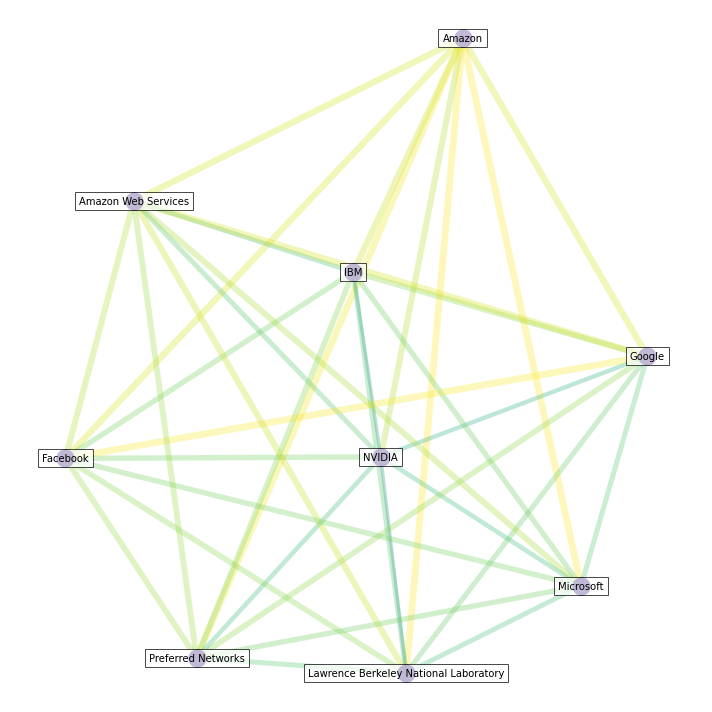

,Amazon,NVIDIA,IBM,Google,Amazon Web Services,Facebook,Preferred Networks,Lawrence Berkeley National Laboratory,Microsoft
Amazon,0.000000,3.063931,3.153349,3.219376,3.222583,3.247445,3.378617,3.437084,3.458730
NVIDIA,3.063931,0.000000,1.694858,2.177681,2.502811,2.701577,2.314324,1.644294,2.313475
IBM,3.153349,1.694858,0.000000,2.823263,2.350562,2.701720,2.785040,2.512974,2.661092
Google,3.219376,2.177681,2.823263,0.000000,3.256870,3.427234,2.848352,2.600907,2.533440
Amazon Web Services,3.222583,2.502811,2.350562,3.256870,0.000000,3.035404,2.932451,3.153332,3.009213
Facebook,3.247445,2.701577,2.701720,3.427234,3.035404,0.000000,2.931731,2.828379,2.703150
Preferred Networks,3.378617,2.314324,2.785040,2.848352,2.932451,2.931731,0.000000,2.528834,2.678526
Lawrence Berkeley National Laboratory,3.437084,1.644294,2.512974,2.600907,3.153332,2.828379,2.528834,0.000000,2.398616
Microsoft,3.458730,2.313475,2.661092,2.533440,3.009213,2.703150,2.678526,2.398616,0.000000


In [ ]:
 CompSim_2('Amazon')

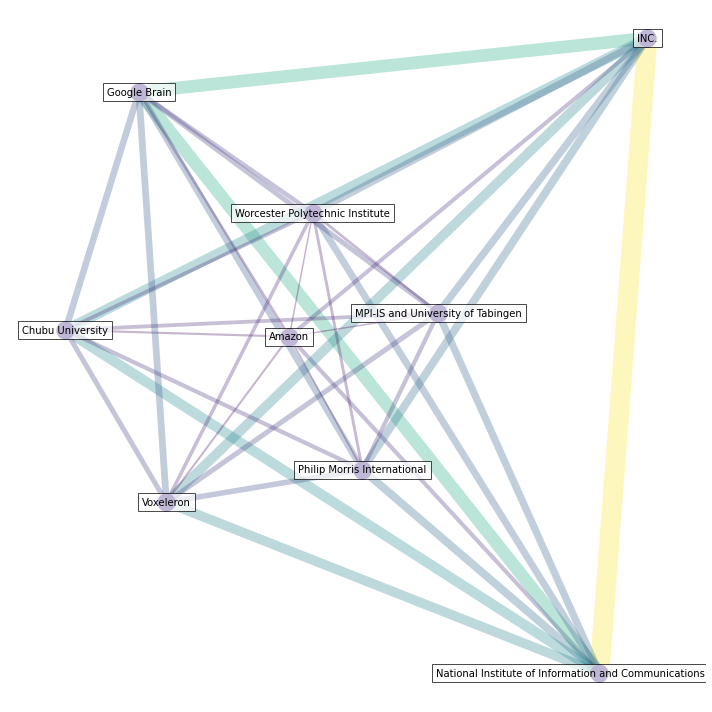

,National Institute of Information and Communications Technology,INC.,Amazon,Google Brain,Chubu University,Voxeleron,Philip Morris International,MPI-IS and University of Tabingen,Worcester Polytechnic Institute
National Institute of Information and Communications Technology,1.000000,1.000000,0.204075,0.635953,0.511343,0.484144,0.399868,0.364962,0.348683
INC.,1.000000,1.000000,0.204075,0.635953,0.511343,0.484144,0.399868,0.364962,0.348683
Amazon,0.204075,0.204075,0.203196,0.130939,0.107348,0.101291,0.084463,0.075419,0.074110
Google Brain,0.635953,0.635953,0.130939,0.635953,0.326657,0.337789,0.326403,0.253833,0.223932
Chubu University,0.511343,0.511343,0.107348,0.326657,0.511343,0.251858,0.210004,0.189252,0.183988
Voxeleron,0.484144,0.484144,0.101291,0.337789,0.251858,0.448857,0.277365,0.256060,0.178246
Philip Morris International,0.399868,0.399868,0.084463,0.326403,0.210004,0.277365,1.000000,0.211168,0.145048
MPI-IS and University of Tabingen,0.364962,0.364962,0.075419,0.253833,0.189252,0.256060,0.211168,0.313422,0.133266
Worcester Polytechnic Institute,0.348683,0.348683,0.074110,0.223932,0.183988,0.178246,0.145048,0.133266,0.347610


In [ ]:
CompSim('Amazon')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
! pip install networkx
import networkx as nx

dm = pd.read_csv('companyDis.csv')
vec = pd.read_csv('vectors_inc.csv', encoding="utf-8-sig")

In [ ]:
companyList = pd.read_csv('companyName.csv')
similarityMatrix = pd.read_csv('refineMatrix.csv')
b = companyList.values
e = []
for sublist in b:
  for item in sublist:
    e.append(item)

def CompSim(name): 
  initializeMatrix = similarityMatrix.values 
  index = e.index(name)
  sortingL = []
  for i in range(0,len(e)):
    sortingL.append((initializeMatrix[index][i],e[i],i))
  res1 = sorted(sortingL,key=lambda x: x[0],reverse=True)[:9]
  res2 = [i[2] for i in res1]
  compName = [i[1] for i in res1]
  resMatrix = np.zeros((len(res2), len(res2)))
  for i in range(0,len(res2)):
    for j in range(0,len(res2)):
      resMatrix[i][j] = initializeMatrix[res2[i]][res2[j]]

  forComp = pd.DataFrame(resMatrix,compName,compName)
  dist_df = forComp
  G = nx.Graph()
  for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        G.add_edge(i,j,weight=dist_df.loc[i][j]*20)

  pos = nx.kamada_kawai_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  cmap = 'bwr'

  fig, ax = plt.subplots(figsize=(10, 10))
  # Visualize graph components
  nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=weights)
  nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
  label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
  nx.draw_networkx_labels(G, pos, font_size=10, bbox=label_options)

  # Resize figure for label readibility
  ax.margins(0.1, 0.05)
  fig.tight_layout()
  plt.axis("off")
  plt.show()
  return forComp

In [ ]:
def CompSim_2(name): 
  LP = list(vec.Inc.unique())
  distanceMatrix = dm.values 
  index = LP.index(name)  
  sortingL = []
  for i in range(0,280):
    sortingL.append((distanceMatrix[index][i],LP[i],i))
  res1 = sorted(sortingL,key=lambda x: x[0],reverse=False)[:9]
  res2 = [i[2] for i in res1]
  compName = [i[1] for i in res1]
  resMatrix = np.zeros((len(res2), len(res2)))
  for i in range(0,len(res2)):
    for j in range(0,len(res2)):
      resMatrix[i][j] = distanceMatrix[res2[i]][res2[j]]
  forComp = pd.DataFrame(resMatrix,compName,compName)
  
  dist_df = forComp
  G = nx.Graph()
  for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        G.add_edge(i,j,weight=dist_df.loc[i][j]*2)

 

  pos = nx.kamada_kawai_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  cmap = 'bwr'



  fig, ax = plt.subplots(figsize=(10, 10))
  # Visualize graph components
  nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=weights)
  nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
  label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
  nx.draw_networkx_labels(G, pos, font_size=10, bbox=label_options)

  # Resize figure for label readibility
  ax.margins(0.1, 0.05)
  fig.tight_layout()
  plt.axis("off")
  plt.show()
  return forComp

In [ ]:
d = pd.read_csv('GTC_Full.csv',encoding="utf-8-sig")
d

,conference,title,description,company,industry
0,NVIDIA GTC 2020,Accelerating Unsupervised SAR Polarimetric Ima...,Our poster presents the unsupervised segmentat...,"Shivam Patel, Visiting Research Student, Unive...",Aerospace / National labs
1,NVIDIA GTC 2020,AI @ The Network Edge (Presented by HPE) [S22480],"It's at the extreme edge of your network, wher...","Jeffrey Winterich, DoD Account Chief Technolog...",Aerospace / National labs
2,NVIDIA GTC 2020,Anomaly Detection on Aircraft Sensor Data Usin...,A vast amount of aircraft sensor data still re...,"Stephane Rion, Deep Learning Scientist, Teradata",Aerospace / National labs
3,NVIDIA GTC 2020,Complex 60 GPU CFD Simulations for Aerospace G...,We'll present a unique new computational fluid...,"Milos Stanic, Product Manager, Altair Engineering",Aerospace / National labs
4,NVIDIA GTC 2020,Deep Learning-Based Anti-Drone System [P21900],This poster is about research on detecting and...,"Hanseob Lee, Ph.D. Candidate, KAIST",Aerospace / National labs
...,...,...,...,...,...
267,NVIDIA GTC 2020,Temporal Information Prediction for Perception...,"Self-driving cars, which have gained significa...","Cheng-Chieh Yang, System Software Engineer, NV...",Engineering / Transportation
268,NVIDIA GTC 2020,Terrain Traversability Estimation using Normal...,Scout is a autonomous robot from Amazon for de...,"Ka Chen, Senior Graphics Engineer, Amazon",Engineering / Transportation
269,NVIDIA GTC 2020,Toward Large-Scale Steady-State Computational ...,Computational fluid dynamics (CFD) simulation ...,"Oliver Hennigh, Software Engineer, NVIDIA",Engineering / Transportation
270,NVIDIA GTC 2020,Ultra-Fast Radar Simulation for Radar System D...,"Ultra-fast, physics-based radar simulations ar...","Jeff Decker, Lead R&D Engineer, ANSYS",Engineering / Transportation
